# Neural Network Model Comparison

This code demonstrates the training and evaluation of three different neural network models: the base model, a pruned model, and a quantized model.

## Setup

The following Python libraries are imported for various tasks:

- `matplotlib.pyplot` for data visualization
- `tensorflow` for building and training neural networks
- `numpy` for numerical operations
- `time` for measuring training time
- `tensorflow.keras.applications.MobileNetV2` for the base model
- `tensorflow_model_optimization.sparsity.keras` for model pruning
- `tensorflow_model_optimization.quantization.keras.quantize_model` for model quantization


In [ ]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.applications import MobileNetV2
from tensorflow_model_optimization.sparsity import keras as sparsity
from tensorflow_model_optimization.quantization.keras import quantize_model
import numpy as np
import time

In [3]:
# Load base model
base_model = MobileNetV2(weights='imagenet')

In [4]:
# Generate dummy data
num_samples = 1000
input_shape = (224, 224, 3)
num_classes = 10

In [5]:
x_train = np.random.random((num_samples,) + input_shape)
y_train = np.random.randint(num_classes, size=num_samples)

In [8]:
# Compile base model
base_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [9]:
# Train the base model and record training time
start_time = time.time()
base_model.fit(x_train, y_train, epochs=2)
base_model_training_time = time.time() - start_time

Epoch 1/2
32/32 [==============================] - 26s 752ms/step - loss: 3.0009 - accuracy: 0.1080
Epoch 2/2
32/32 [==============================] - 24s 732ms/step - loss: 1.8215 - accuracy: 0.4120


In [10]:
# Pruning
pruning_params = {
    'pruning_schedule': sparsity.PolynomialDecay(initial_sparsity=0.50, final_sparsity=0.90, begin_step=0, end_step=100)
}
pruned_model = sparsity.prune_low_magnitude(base_model, **pruning_params)

# Define callback
update_pruning = sparsity.UpdatePruningStep()

In [11]:
# Compile and train pruned model
pruned_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
start_time = time.time()
pruned_model.fit(x_train, y_train, epochs=2, callbacks=[update_pruning])  # Add the UpdatePruningStep callback
pruned_model_training_time = time.time() - start_time

Epoch 1/2
32/32 [==============================] - 35s 735ms/step - loss: 1.6711 - accuracy: 0.4270
Epoch 2/2
32/32 [==============================] - 23s 720ms/step - loss: 0.7952 - accuracy: 0.7550


In [12]:
# Quantization
quantized_model = quantize_model(base_model)

In [13]:
# Compile quantized model
quantized_model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [14]:
# Train the quantized model and record training time
start_time = time.time()
quantized_model.fit(x_train, y_train, epochs=2)
quantized_model_training_time = time.time() - start_time

Epoch 1/2
32/32 [==============================] - 35s 956ms/step - loss: 2.2940 - accuracy: 0.1660
Epoch 2/2
32/32 [==============================] - 31s 980ms/step - loss: 2.1893 - accuracy: 0.1880


In [15]:
# Evaluate models and record accuracy and loss
def evaluate_model(model):
    loss, accuracy = model.evaluate(x_train, y_train)
    return loss, accuracy

In [16]:
base_loss, base_accuracy = evaluate_model(base_model)
pruned_loss, pruned_accuracy = evaluate_model(pruned_model)
quantized_loss, quantized_accuracy = evaluate_model(quantized_model)

32/32 [==============================] - 6s 178ms/step - loss: 5.0820 - accuracy: 0.0990


In [17]:
# Data for plotting
labels = ['Base Model', 'Pruned Model', 'Quantized Model']
accuracies = [base_accuracy, pruned_accuracy, quantized_accuracy]
losses = [base_loss, pruned_loss, quantized_loss]
training_times = [base_model_training_time, pruned_model_training_time, quantized_model_training_time]

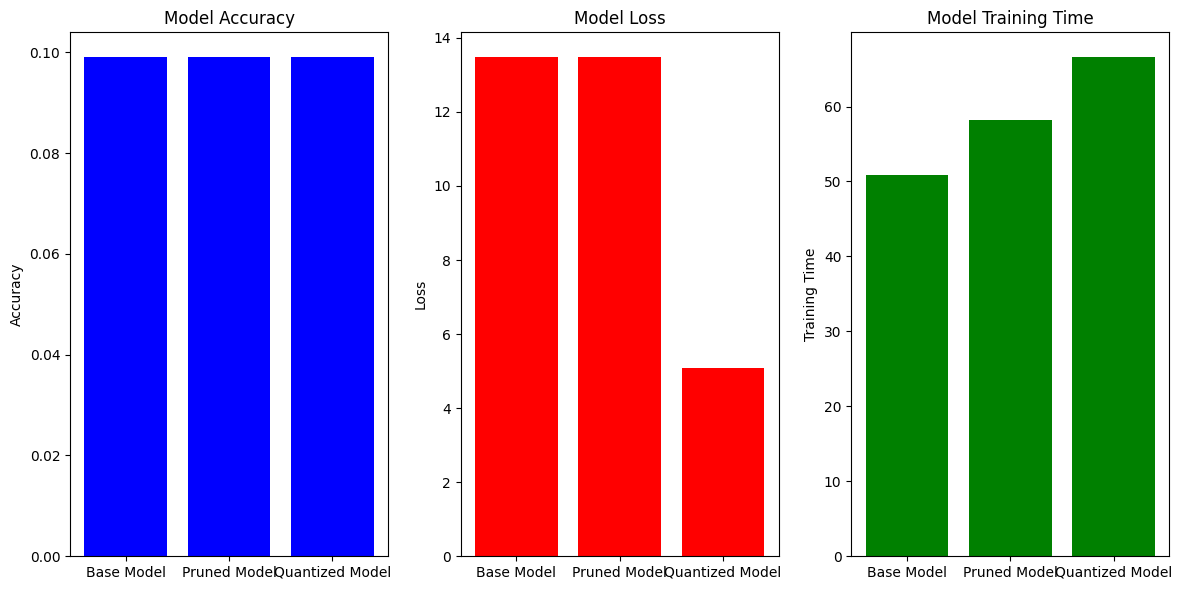

In [18]:
# Plotting
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.bar(labels, accuracies, color='blue')
plt.ylabel('Accuracy')
plt.title('Model Accuracy')

plt.subplot(1, 3, 2)
plt.bar(labels, losses, color='red')
plt.ylabel('Loss')
plt.title('Model Loss')

plt.subplot(1, 3, 3)
plt.bar(labels, training_times, color='green')
plt.ylabel('Training Time')
plt.title('Model Training Time')

plt.tight_layout()
plt.show()